In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
import sys

sys.path.append("..")

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
from models import LIF, LIF_Ref_Period, LIF_Spike_Rate_Adaption
from util.spike_trains import get_poisson_spike_train

<IPython.core.display.Javascript object>

In [17]:
dt = 0.1
size = 5000
spike_train = np.zeros(size - 1)
spike_train[1000:2000:2] = 40
spike_train[3000:4000:2] = 40

<IPython.core.display.Javascript object>

In [18]:
poisson_spike_trains = get_poisson_spike_train(500, size - 1, 1, dt)
p_spike_train = poisson_spike_trains[:, 0]
p_spike_train *= 30

<IPython.core.display.Javascript object>

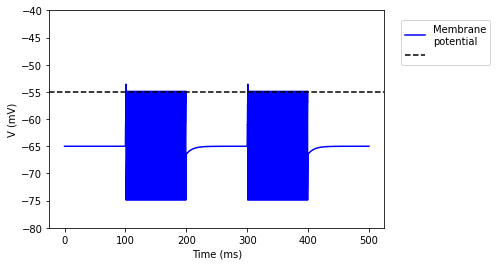

<IPython.core.display.Javascript object>

In [19]:
lif = LIF(dt=dt)
lif.insert_spike_train(spike_train)
lif.plot(size)

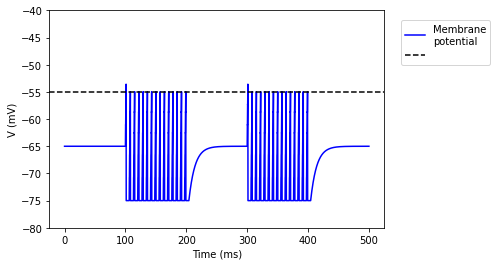

<IPython.core.display.Javascript object>

In [20]:
lif_ref_per = LIF_Ref_Period(t_ref=5, dt=dt)
lif_ref_per.insert_spike_train(spike_train)
lif_ref_per.plot(size)

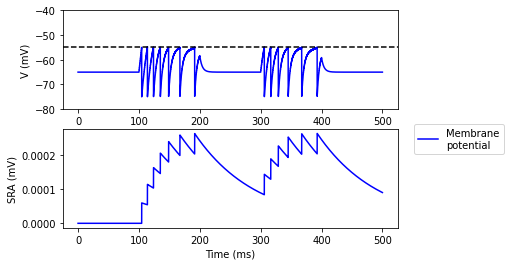

<IPython.core.display.Javascript object>

In [21]:
lif_sra = LIF_Spike_Rate_Adaption(dt=dt, g_delta=0.006, tau_m=100, R=90)
lif_sra.insert_spike_train(spike_train)

lif_sra.plot(size)

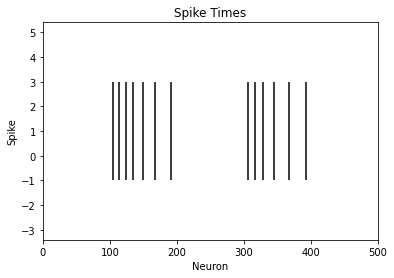

<IPython.core.display.Javascript object>

In [22]:
lif_sra.plot_spikes(size)

In [ ]:
0.06 / 30